In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
with open('data/stock_data.csv', encoding = 'UTF-8') as f:
    df = pd.read_csv(f)

In [3]:
df.head(3)

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1


In [4]:
df.tail(3)

,Text,Sentiment
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1
5790,"#Sensex, #Nifty climb off day's highs, still u...",1


In [5]:
df.Sentiment.unique()

array([ 1, -1], dtype=int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [7]:
df.describe()

,Sentiment
count,5791.000000
mean,0.272664
std,0.962192
min,-1.000000
25%,-1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
df['Text length'] = df.Text.apply(len)

In [9]:
df.head()

,Text,Sentiment,Text length
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,95
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,95
2,user I'd be afraid to short AMZN - they are lo...,1,114
3,MNTA Over 12.00,1,17
4,OI Over 21.37,1,16


In [10]:
def change(word):
    if word == -1:
        return 'Negative feed back'
    else:
        return 'Positive feed back'

In [11]:
df['Sentiment'] = df.Sentiment.apply(change)

In [12]:
df.head()

,Text,Sentiment,Text length
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,Positive feed back,95
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,Positive feed back,95
2,user I'd be afraid to short AMZN - they are lo...,Positive feed back,114
3,MNTA Over 12.00,Positive feed back,17
4,OI Over 21.37,Positive feed back,16


In [13]:
df.tail()

,Text,Sentiment,Text length
5786,Industry body CII said #discoms are likely to ...,Negative feed back,122
5787,"#Gold prices slip below Rs 46,000 as #investor...",Negative feed back,123
5788,Workers at Bajaj Auto have agreed to a 10% wag...,Positive feed back,140
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",Positive feed back,131
5790,"#Sensex, #Nifty climb off day's highs, still u...",Positive feed back,117


In [14]:
df.Sentiment.unique()

array(['Positive feed back', 'Negative feed back'], dtype=object)

## Exploratory Data analysis (EDA)

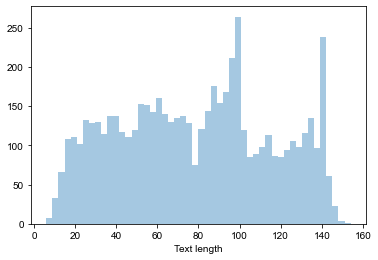

In [15]:
sns.distplot(df['Text length'], kde = False, bins = 50)
sns.set_style('darkgrid')

<Figure size 864x288 with 0 Axes>

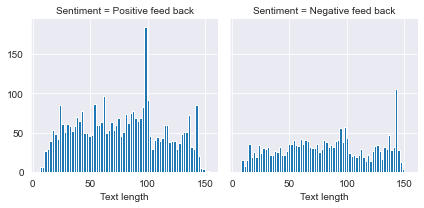

<Figure size 864x288 with 0 Axes>

In [16]:
x = sns.FacetGrid(df, col = 'Sentiment')
x.map(plt.hist, 'Text length', bins = 70)
plt.figure(figsize = (12, 4))

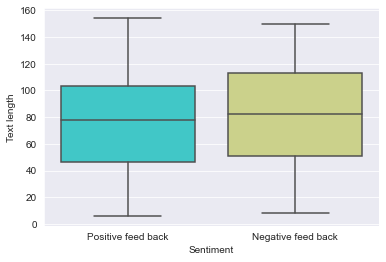

In [17]:
sns.boxplot(x = 'Sentiment', y = 'Text length', palette= 'rainbow', data = df)

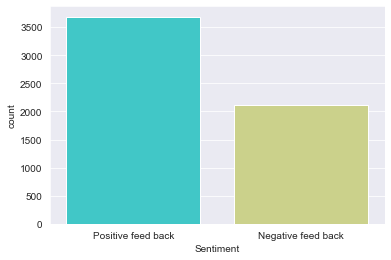

In [18]:
sns.countplot(x = 'Sentiment', palette = 'rainbow', data = df)

In [19]:
df.groupby('Sentiment').describe()

Text length                                                \
                         count       mean        std  min   25%   50%    75%   
Sentiment                                                                      
Negative feed back      2106.0  81.505223  38.697109  8.0  51.0  82.0  113.0   
Positive feed back      3685.0  76.794844  36.547817  6.0  46.0  78.0  103.0   

                           
                      max  
Sentiment                  
Negative feed back  150.0  
Positive feed back  154.0

In [20]:
df[(df['Text length'] == 150) | (df['Text length'] == 154)]

,Text,Sentiment,Text length
5038,RT @lizrhoffman: â€œWe were on a good roll thr...,Negative feed back,150
5176,RT @PaulJDavies: Interesting timing&gt;&gt; Sa...,Positive feed back,150
5193,RT @Spencerjakab: Please ignore the â€œI saw t...,Positive feed back,154
5297,Investors on today's jobs number: â€I donâ€™t...,Negative feed back,150


In [21]:
df[df['Text length'] == 150]['Text'].iloc[0]

'RT @lizrhoffman: â€œWe were on a good roll through January and February,â€\x9d Goldman CFO Stephen Scherr tells me. â€œThen came March.â€\x9d \n\nUpdated wâ€¦'

In [22]:
df[df['Text length'] == 154]['Text'].iloc[0]

'RT @Spencerjakab: Please ignore the â€œI saw the coronavirus coming, hereâ€™s whatâ€™s nextâ€\x9d stuff and read my latest for â\x81¦@WSJheardâ\x81© instead httâ€¦'

In [23]:
import string

In [24]:
from nltk.corpus import stopwords

In [25]:
from nltk.stem import PorterStemmer

In [26]:
ps = PorterStemmer()

In [27]:
def text(word):
    book = ''.join([a for a in word if a not in string.punctuation])
    
    books = ''.join(ps.stem(word) for word in book.split())
    
    return [x for x in books.split() if x.lower() not in stopwords.words('english')]
 

### Tokenization

In [28]:
df.Text.apply(text)

0       [kickeronmywatchlistxidetitsoqpnkcpwbpzAJtrade...
1       [useraapmovi55returnforthefeageindicjust15trad...
2       [userIdbeafraidtoshortamzntheyarelooklikeanear...
3                                          [mntaover1200]
4                                            [OIover2137]
                              ...                        
5786    [industribodiciisaiddiscomareliketosufferanetr...
5787    [goldpriceslipbelowRs46000asinvestorbookprofit...
5788    [workeratbajajautohaveagretoa10wagecutforthepe...
5789    [sharemarketlivesensexoffday’highup600pointnif...
5790    [sensexnifticlimboffdayhighstillup2keyfactordr...
Name: Text, Length: 5791, dtype: object

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

In [32]:
X = df.Text
y = df.Sentiment

In [33]:
count = CountVectorizer()

In [34]:
X = count.fit_transform(X)

In [35]:
tf = TfidfTransformer()

In [36]:
X = tf.fit_transform(X)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
NB = MultinomialNB()

In [40]:
NB.fit(X_train, y_train)

MultinomialNB()

In [41]:
prediction = NB.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
print('Accuracy score: ', accuracy_score(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

Accuracy score:  0.7163406214039125


[[ 162  457]
 [  36 1083]]


                    precision    recall  f1-score   support

Negative feed back       0.82      0.26      0.40       619
Positive feed back       0.70      0.97      0.81      1119

          accuracy                           0.72      1738
         macro avg       0.76      0.61      0.61      1738
      weighted avg       0.74      0.72      0.67      1738



## Explanatory Data Analysis

#### Using recall result

In [44]:
Negative_feed_back = 0.26
Positive_feed_back = 0.97

In [45]:
Total_precision = Negative_feed_back + Positive_feed_back

In [46]:
Percentage_negative_feed_back = np.round((Negative_feed_back/ Total_precision) * 100, 1)

In [47]:
Percentage_positive_feed_back = np.round((Positive_feed_back/ Total_precision) * 100, 1)

In [48]:
print('Percentage of Negative feed back: ', Percentage_negative_feed_back)
print('\n')
print('Percentage of Positive feed back: ', Percentage_positive_feed_back)

Percentage of Negative feed back:  21.1


Percentage of Positive feed back:  78.9


In [49]:
plot = {'Feed back': ['Positive feed back', 'Negative feed back'],
    'Rating (%)': [78.9, 21.1]}

In [50]:
p1 = pd.DataFrame(plot)

In [51]:
p1

,Feed back,Rating (%)
0,Positive feed back,78.9
1,Negative feed back,21.1


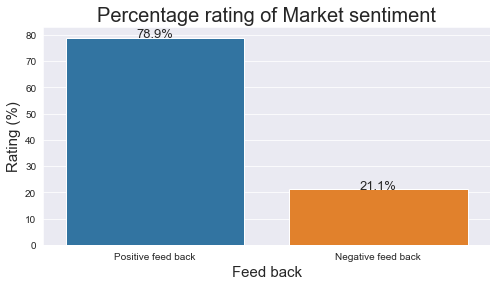

In [52]:
plt.figure(figsize = (8, 4))
ax = sns.barplot(x = 'Feed back', y = 'Rating (%)', data = p1)
plt.title('Percentage rating of Market sentiment', fontsize = 20)
plt.xlabel('Feed back', fontsize = 15)
plt.ylabel('Rating (%)', fontsize = 15)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width()/ 2
    y = p.get_height() + .05
    ax.annotate(percentage, (x, y), ha = 'center', size = 13)